Color Identification in Images

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

The type of this input is <class 'numpy.ndarray'>
Shape: (168, 300, 3)


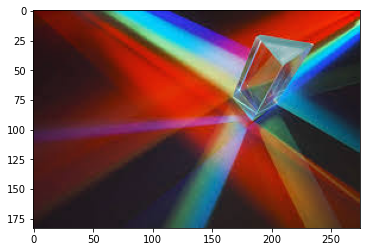

In [15]:
image = cv2.imread('D:/abcd/1.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


The color of the image looks a bit off. This is because, by default, OpenCV reads image in the sequence Blue Green Red (BGR). Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).



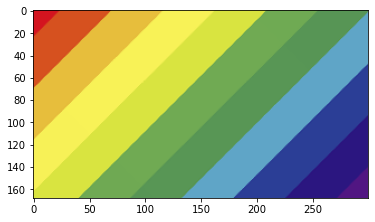

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

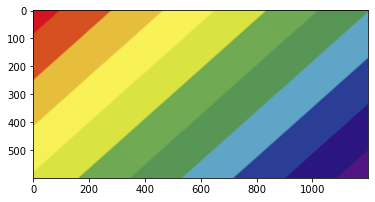

In [4]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [5]:
# COLOR IDNTIFICATION
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))



KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

I have combined all the steps in two method.

In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
#     print(modified_image)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    print(labels)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[ 9  9  9 ... 10 10 10]


[array([ 43.20235867,  62.41379633, 150.19262449]),
 array([217.06318606, 228.02113484,  64.04390803]),
 array([ 94.92629305, 164.866565  , 198.69189224]),
 array([111.57681458, 169.75219703,  83.00911359]),
 array([214.05230769,  81.41923077,  31.13326923]),
 array([ 87.78832275, 149.79244669,  85.18997233]),
 array([230.99609604, 189.99697443,  60.00731993]),
 array([ 80.71303395,  22.        , 129.98247536]),
 array([212.        ,  21.51480959,  31.        ]),
 array([247.53902138, 241.5533173 ,  86.8410553 ]),
 array([165.07913669, 198.75179856,  73.86690647]),
 array([ 43.16951843,  22.31733992, 128.19686012])]

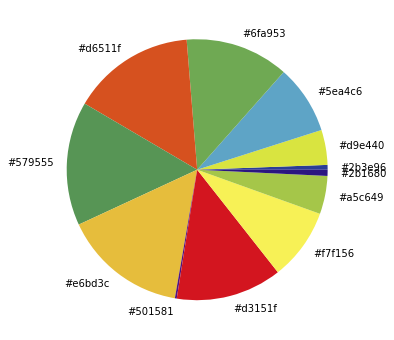

In [13]:
get_colors(get_image('D:/abcd/1.png'), 12, True)